# Kernel methods

**Course:** Introduction to Machine Learning  
**Last updated:** 2025-11-26
**Author:** dia

## Introduction

In our previous laboratory, we explored linear parametric models for regression and classification. These models employed a mapping $y(x, \omega)$, where the input $x$ is transformed to the output $y$ using an adaptive vector of parameters $\omega$. During model training, the dataset serves a dual purpose: first, to estimate the parameter vector, and second, to derive a posterior distribution over the parameter vector. Once this learning phase concludes, we rely solely on this trained parameter vector $\omega$ for predictions, without the need for the original training data. This method is foundational not only for linear models but also extends to nonlinear models, such as neural networks.

Contrasting this, there exists a distinct group of **pattern recognition** techniques where training data, or a specific subset, remains indispensable during the prediction phase. Termed as *memory-based methods*, these algorithms retain the entire training set, using it as a reference for predicting future data points. Central to their function is a defined metric that measures the similarity between any two input vectors. While these methods offer the advantage of swift training times, they can be slower when generating predictions for new data.

To navigate nonlinear relationships within the data, we can introduce a nonlinear **feature space** $\Phi(x)$, where, $\Phi(\cdot)$ represents a nonlinear function that expands the initial features, potentially even to an infinite dimension. This leads us to the **kernel function**, formulated as

\begin{equation}
k(x, z) = \Phi(x)^\top\Phi(z)
\end{equation}

For a more intuitive understanding, consider the scenario where $\Phi(x) = x$. This gives us the kernel function $k(x, z) = x^\top z$, noted as the **linear kernel**.

Building upon the linear regression model and integrating the nonlinear transformation, the objective function can be expressed as

\begin{equation}
J(\omega) = \sum_{n=1}^{N} (y_n - \omega^\top \Phi(x_n))^2 + \lambda \omega^\top \omega = \|y - \Phi(X) \omega\|^2 + \lambda \|\omega\|^2
\end{equation}

with the regularization term $\lambda \geq 0$. Setting the gradient of $J(\omega)$ with respect to $\omega$ to zero, we deduce that

\begin{equation}
\omega = \frac{1}{\lambda} \sum_{n=1}^{N} (y_n - \omega^\top \Phi(x_n)) \Phi(x_n) = \sum_{n=1}^{N} \alpha_n \Phi(x_n) = \Phi^\top \alpha
\end{equation}

We see that $\omega$ is a linear combination of the transformed feature vectors $\Phi^\top \alpha$, where $\alpha = \frac{1}{\lambda} (y_n - \omega^\top \Phi(x_n))$ represents the linear coefficients. Further we can consider the following substitution $\omega \rightarrow \Phi^\top \alpha$ where $\Phi$ is the design matrix, whose *n*th row is given by $\Phi(x_n)^\top$.

This formulation provides a powerful framework for tackling problems with complex, nonlinear patterns. When we kernelize this method, we replace the dot products with a kernel function. The trick here is to think about our problem in terms of the feature mapping $\Phi$. Thus, the Ridge Regression objective in the feature space becomes

\begin{equation}
J(\alpha) = \|y - \alpha^\top \Phi(X)^\top \Phi(X)\|^2 + \lambda \alpha^\top \Phi(X)^\top \Phi(X) \alpha
\end{equation}

When you differentiate and equate to zero to find the minimum of this cost function with respect to $\alpha$, we get

\begin{equation}
(\Phi(X)^\top \Phi(X) + \lambda I) \alpha = y
\end{equation}

which leads to

\begin{equation}
(K + \lambda I) \alpha = y
\end{equation}

where we used the kernel trick

\begin{equation}
K = \Phi(X)^\top \Phi(X)
\end{equation}

For the Kernel Ridge Regression problem, the prediction is achieved by computing:

\begin{equation}
y\_pred = \Phi(X)^\top\Phi(Z) \cdot \alpha = K(X, Z) \cdot \alpha
\end{equation}

## Generating a simple nonlinear dataset





#### Assessment - 1

Write a function **generate_quadratic_dataset** that is going to generate a random quadratic dataset for the *Kernel Ridge Regression* problem.

We consider that data is generated as following

\begin{equation}
y = (X \odot X) \alpha + \epsilon
\end{equation}

where $X_{ij} \sim \mathcal{U}(low_{m_j}, high_{m_j})$ and $\epsilon_i \sim \mathcal{N}(0, \sigma_{noise}^2)$ is a Gaussian noise.

*Hint*: Consider using the following functions [np.random.uniform](https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html) and [np.random.normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) for generating the feature space and Gaussian noise.

In [1]:
import numpy as np

def generate_quadratic_dataset(n, m, low_m, high_m, alpha, sigma_noise):
    """
    Generate a quadratic dataset.

    Parameters:
    - n: Number of data points.
    - m: Number of features (input dimensions).
    - low_m: Lower bound for random data generation.
    - high_m: Upper bound for random data generation.
    - alpha: Weight matrix of shape (m, 1) for linear combination of features.
    - sigma_noise: Standard deviation of the Gaussian noise added to data.

    Returns:
    - X: Generated input data of shape (n, m).
    - y: Corresponding output data of shape (n, 1).
    """

    X = np.random.uniform(low_m,high_m,(n,m)) # WRITE YOUR IMPLEMENTATION HERE
    Xsq = X * X # WRITE YOUR IMPLEMENTATION HERE
    noise = np.random.normal(0,sigma_noise**2,(n,1)) # WRITE YOUR IMPLEMENTATION HERE

    # Compute output using matrix multiplication
    y = Xsq @ alpha + noise # WRITE YOUR IMPLEMENTATION HERE

    return X, y

Run the following code and explore the linear data visualization.

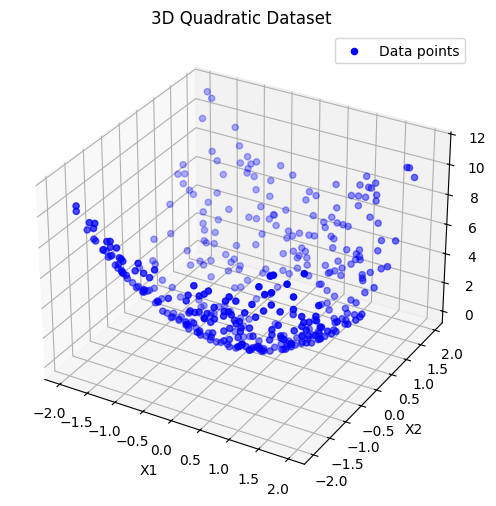

In [3]:
import matplotlib.pyplot as plt

# Parameters
n = 400
m = 2
low_m, high_m = -2, 2
alpha = np.array([[1.0], [2.0]])
noise_std = 0.1

# Creating the dataset
X, y = generate_quadratic_dataset(n, m, low_m, high_m, alpha, noise_std)
y = y.ravel()

# Plotting
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], y, color='blue', marker='o', label="Data points")
ax.set_title("3D Quadratic Dataset")
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("Y")
plt.grid(True)
plt.legend()
plt.show()

## Kernel functions

Kernel functions play a pivotal role in various machine learning algorithms, especially for any algorithm that requires a measure of distance in a transformed feature space.

Further, we need to implement several **kernel functions**

### 1. Linear Kernel

The linear kernel is the simplest form of kernel functions. It is merely the dot product of two vectors.

\begin{equation}
K(x, z) = x^T z
\end{equation}

### 2. Radial Basis Function (RBF) Kernel

RBF is a popular kernel function mainly used in classification problems. It can map an input space in infinite-dimensional space.

\begin{equation}
K(x, z) = \exp\left(-\gamma \lVert x-z \rVert^2\right)
\end{equation}

here $ \gamma $ is a parameter that sets how much influence a single training example has.

### 3. Polynomial Kernel

The polynomial kernel is a kernel function commonly used, representing the similarity of vectors in a feature space over polynomials of the original variables.

\begin{equation}
K(x, z) = (c + \gamma x^T z)^d
\end{equation}

where $ c $ is the constant offset added to scaled inner product, $ \gamma $ is the coefficient of the vector inner product (in general $1  / m$, with $m$ representing the number of features) and $ d $ is the degree of the polynomial.


#### Assessment - 2

While libraries like [scikit-learn](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics.pairwise) offer functionalities to construct kernel matrices effortlessly, we'll delve deeper by constructing our own kernel functions from the ground up.

For each kernel type mentioned earlier, let's craft a Python function that constructs the corresponding kernel matrix. After constructing these matrices, we'll visualize the results to appreciate the impact of distance metrics in the kernel space.

Experimenting with different parameter values will give insight into their influence on the kernel matrix.

*Hint*: To compute distances between pairs of points from two collections, consider leveraging the [scipy.spatial.distance.cdist](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cdist.html) function. Notice that the samples in each matrix are written in rows.

In [4]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interactive

def linear_kernel(X, Z):
    return X.T @ Z # WRITE YOUR IMPLEMENTATION HERE

def rbf_kernel(X, Z, gamma=1):
    dists = scipy.spatial.distance.cdist(X,Z,'euclidean')# WRITE YOUR IMPLEMENTATION HERE
    return np.exp(-gamma * dists**2)  # WRITE YOUR IMPLEMENTATION HERE

def polynomial_kernel(X, Z, c=1, gamma=0.5, degree=2):
    return (c + gamma * X.T @ Z)**degree # WRITE YOUR IMPLEMENTATION HERE

def plot_kernels(gamma_rbf=1.0, c=1, gamma_poly=0.5, degree=2):
    K_linear = linear_kernel(X, X)
    K_rbf = rbf_kernel(X, X, gamma=gamma_rbf)
    K_poly = polynomial_kernel(X, X, c=c, gamma=gamma_poly, degree=degree)

    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    cmaps = ['Reds', 'Blues', 'Greens']

    for ax, K, title, cmap in zip(axes, [K_linear, K_rbf, K_poly],
                                  ['Linear Kernel', 'RBF Kernel', 'Polynomial Kernel'], cmaps):
        cax = ax.matshow(K, cmap=cmap)
        plt.colorbar(cax, ax=ax)
        ax.set_title(title)

    plt.tight_layout()
    plt.show()

# Use ipywidgets to create interactive plots
interactive_plot = interactive(plot_kernels,
                               gamma_rbf=widgets.FloatSlider(min=0.1, max=5, step=0.1, value=1.0),
                               c=widgets.FloatSlider(min=0.1, max=5, step=0.1, value=1.0),
                               gamma_poly=widgets.FloatSlider(min=0.1, max=5, step=0.1, value=0.5),
                               degree=widgets.IntSlider(min=1, max=10, step=1, value=2))
output = interactive_plot.children[-1]
interactive_plot


interactive(children=(FloatSlider(value=1.0, description='gamma_rbf', max=5.0, min=0.1), FloatSlider(value=1.0…

## Kernel Ridge Regression

We remind the definition of the Kernel Ridge Regressione (KRR) problem

\begin{equation}
(k(X, X) + \lambda I) \alpha = y
\end{equation}

Since this is a standard linear system, the solution of the problem can be computed following the **Least Squared Method** or **Cholesky Decomposition**.
You are encouraged to select the approach that best suits your needs or preferences.

#### Assessment - 3

Having already prepared the dataset and defined the kernel functions, we can now proceed with the Kernel Ridge Regression (KRR) problem.

Initially, we will partition the original dataset into training and testing subsets.

Your task is to construct the **kernel_ridge_regression** and **predict** functions, which will be responsible for solving the problem and making predictions respectively.

Once completed, examine the results using the provided visualization to gain insights into the model's predictions.

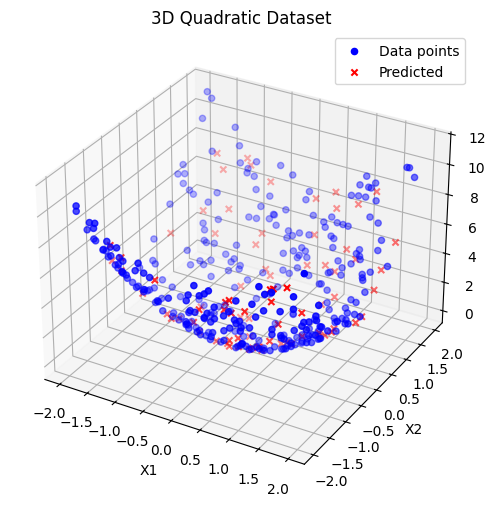

In [14]:
from sklearn.model_selection import train_test_split
import numpy as np

# Split the initial dataset in train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

def kernel_ridge_regression(X_train, y_train, kernel_function, lambda_val, **kwargs):
    K = kernel_function(X_train,X_train) # WRITE YOUR IMPLEMENTATION HERE

    K_reg = K + lambda_val * np.eye(K.shape[0])
    alpha = np.linalg.solve(K_reg,y_train) # WRITE YOUR IMPLEMENTATION HERE
    return alpha

def predict(X_train, X_test, alpha, kernel_function, **kwargs):
    K = kernel_function(X_test,X_train)# WRITE YOUR IMPLEMENTATION HERE
    return K @ alpha # WRITE YOUR IMPLEMENTATION HERE

# Solve the Kernel Ridge Regression problem
alpha = kernel_ridge_regression(X_train, y_train, rbf_kernel, 0.1, gamma=0.01)
y_pred = predict(X_train, X_test, alpha, rbf_kernel, gamma=0.01)

# Plotting
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_train[:, 0], X_train[:, 1], y_train, color='blue', marker='o', label="Data points")
ax.scatter(X_test[:, 0], X_test[:, 1], y_pred, color='red', marker='x', label='Predicted')
ax.set_title("3D Quadratic Dataset")
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("Y")
plt.grid(True)
plt.legend()
plt.show()

To better understand the relationship between the data features and the output, we will generate two side-by-side scatter plots, where the left plot visualizes the data based on the first feature and the right plot visualizes the data based on the second feature.

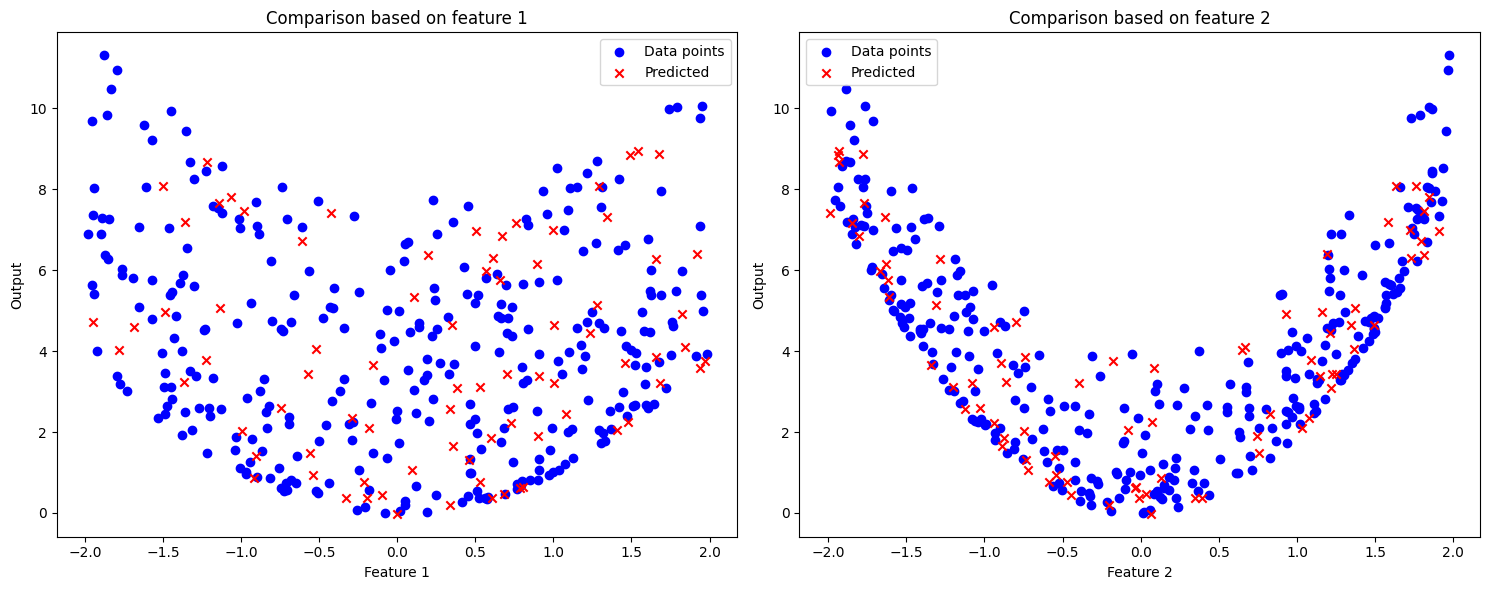

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Scatter plot for X_train[:, 0] and y_train vs. X_test[:, 0] and y_pred
axes[0].scatter(X_train[:, 0], y_train, color='blue', marker='o', label="Data points")
axes[0].scatter(X_test[:, 0], y_pred, color='red', marker='x', label='Predicted')
axes[0].set_title("Comparison based on feature 1")
axes[0].set_xlabel("Feature 1")
axes[0].set_ylabel("Output")
axes[0].legend()

# Scatter plot for X_train[:, 1] and y_train vs. X_test[:, 1] and y_pred
axes[1].scatter(X_train[:, 1], y_train, color='blue', marker='o', label="Data points")
axes[1].scatter(X_test[:, 1], y_pred, color='red', marker='x', label='Predicted')
axes[1].set_title("Comparison based on feature 2")
axes[1].set_xlabel("Feature 2")
axes[1].set_ylabel("Output")
axes[1].legend()

# Show the plots side-by-side
plt.tight_layout()
plt.show()

## Cross-Validation for Hyperparameter Tuning

Cross-validation is a statistical technique used to evaluate the performance of a machine learning model. Instead of splitting the dataset just once into a training set and a test set, cross-validation splits the dataset multiple times into different training and test (or validation) sets. This way, the model is trained and evaluated multiple times on different subsets of the data, providing a more comprehensive assessment of its performance.

A common form of cross-validation is **k-fold cross-validation**:

1. The dataset is randomly partitioned into $k$ equal-sized subsets or "folds".
2. The model is trained on $k-1$ of these folds and tested on the remaining fold.
3. This process is repeated $k$ times, with each fold serving as the test set exactly once.
4. The $k$ results are then averaged to produce a single performance metric.

For example, in 5-fold cross-validation, the dataset is divided into 5 subsets, and the process is repeated 5 times, each time with a different subset serving as the test set.

Hyperparameters are parameters of the machine learning algorithm that are not learned from the data but are set before training. Examples include the learning rate in many algorithms, the depth of a decision tree, or the $C$ parameter in SVMs. In our case we have different hyperparameters like $\lambda$ r the kernel function parameters s.a. $\gamma$, $c$, $d$.

#### Assessment - 4

Your task is to complete the **cross_validate** function, which will identify the optimal hyperparameter for the RBF kernel function using 5-fold cross-validation.

Conduct experiments using the following values for $ \gamma \in \{0.001, 0.01, 0.1, 1, 10, 100, 1000\} $. The optimal $ \gamma $ will be the one that results in the lowest error.

After determining the best $ \gamma $, retake the KRR experiment to observe any improvements in the results.

In [17]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

def cross_validate(X, y, kernel_function, lambda_val, gamma_vals, n_splits=5):
    kf = KFold(n_splits=n_splits)
    errors = []

    for gamma in gamma_vals:
        fold_errors = []
        for train_index, val_index in kf.split(X):
            X_train, X_val = X[train_index], X[val_index]
            y_train, y_val = y[train_index], y[val_index]

            alpha = kernel_ridge_regression(X_train, y_train, kernel_function, lambda_val, gamma=gamma)# WRITE YOUR IMPLEMENTATION HERE
            y_pred = predict(X_train, X_val, alpha, kernel_function, gamma=gamma) # WRITE YOUR IMPLEMENTATION HERE

            fold_errors.append(mean_squared_error(y_val, y_pred))

        avg_error = np.mean(fold_errors)
        errors.append(avg_error)
        print(f"Gamma: {gamma}, CV Error: {avg_error}")

    best_gamma = gamma_vals[np.argmin(errors)]
    return best_gamma

gamma_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
best_gamma = cross_validate(X_train, y_train, rbf_kernel, 0.1, gamma_values)
print(f"Best gamma value: {best_gamma}")

Gamma: 0.001, CV Error: 0.08457416409154087
Gamma: 0.01, CV Error: 0.08457416409154087
Gamma: 0.1, CV Error: 0.08457416409154087
Gamma: 1, CV Error: 0.08457416409154087
Gamma: 10, CV Error: 0.08457416409154087
Gamma: 100, CV Error: 0.08457416409154087
Gamma: 1000, CV Error: 0.08457416409154087
Best gamma value: 0.001


We will now re-evaluate the model using the optimal hyperparameters.

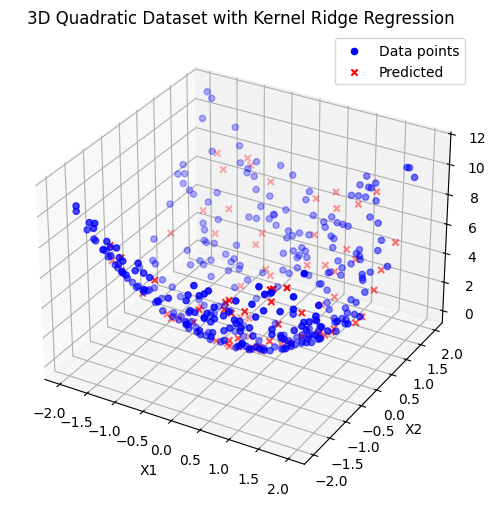

In [18]:
# Solve the Kernel Ridge Regression problem using the best gamma value
alpha = kernel_ridge_regression(X_train, y_train, rbf_kernel, 0.1, gamma=best_gamma)
y_pred = predict(X_train, X_test, alpha, rbf_kernel, gamma=best_gamma)

# Plotting
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_train[:, 0], X_train[:, 1], y_train, color='blue', marker='o', label="Data points")
ax.scatter(X_test[:, 0], X_test[:, 1], y_pred, color='red', marker='x', label='Predicted')
ax.set_title("3D Quadratic Dataset with Kernel Ridge Regression")
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("Y")
plt.grid(True)
plt.legend()
plt.show()

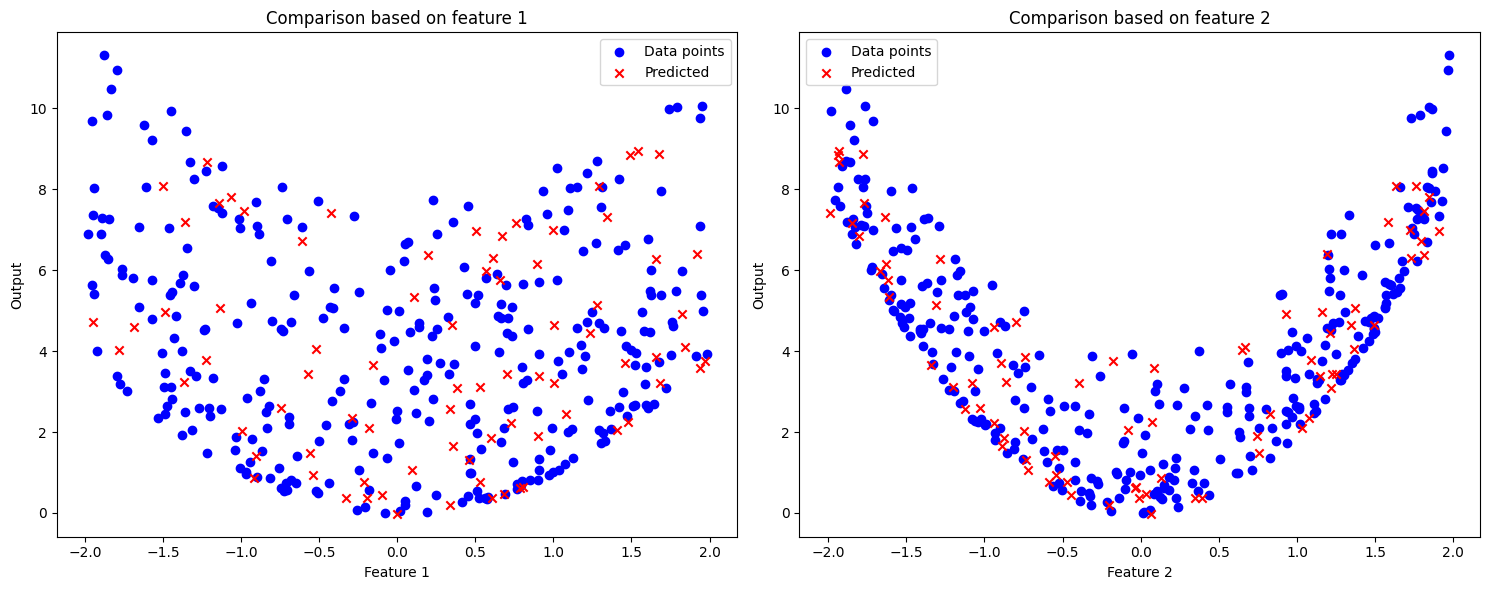

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Scatter plot for X_train[:, 0] and y_train vs. X_test[:, 0] and y_pred
axes[0].scatter(X_train[:, 0], y_train, color='blue', marker='o', label="Data points")
axes[0].scatter(X_test[:, 0], y_pred, color='red', marker='x', label='Predicted')
axes[0].set_title("Comparison based on feature 1")
axes[0].set_xlabel("Feature 1")
axes[0].set_ylabel("Output")
axes[0].legend()

# Scatter plot for X_train[:, 1] and y_train vs. X_test[:, 1] and y_pred
axes[1].scatter(X_train[:, 1], y_train, color='blue', marker='o', label="Data points")
axes[1].scatter(X_test[:, 1], y_pred, color='red', marker='x', label='Predicted')
axes[1].set_title("Comparison based on feature 2")
axes[1].set_xlabel("Feature 2")
axes[1].set_ylabel("Output")
axes[1].legend()

# Show the plots side-by-side
plt.tight_layout()
plt.show()

## References

- Bishop, Christopher M., and Nasser M. Nasrabadi. Pattern recognition and machine learning. Vol. 4. No. 4. New York: springer, 2006.